# Introduction
Welcome to the analysis of the Brazilian e-commerce dataset from Olist Store. This project aims to test several hypotheses to determine their statistical significance in relation to the broader population. By examining various aspects of the dataset, we hope to uncover insights that can benefit sellers on the e-commerce platform.

## Hypotheses

1. Influence of Payment Methods on Purchase Frequency:<br>
<br>
    - We hypothesize that certain payment methods are preferred by customers and lead to higher purchase frequency. Sellers can offer and promote these preferred payment methods to increase sales.<br>
<br>
2. Effect of Product Reviews on Sales:<br>
<br>
    - We hypothesize that products with higher review ratings have higher sales. Sellers can focus on improving product quality and encouraging satisfied customers to leave positive reviews to boost sales.<br>
<br>
3. Customer Loyalty and Repurchase Rates:<br>
<br>
   - We hypothesize that customers who leave positive reviews are more likely to make repeat purchases. Sellers can implement loyalty programs and follow-up strategies to encourage repeat business from satisfied customers.


# About the dataset

The dataset can be found on kaggle [click here to view dataset in kaggle](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)

This dataset contains public information on orders made at Olist Store, a Brazilian e-commerce platform. It includes details of 100,000 orders from 2016 to 2018 across various marketplaces in Brazil.

While this dataset offers a comprehensive view of sales during that period, it does not cover the entire population of all possible sales data. Therefore, it is considered a **sample dataset**.

**Hypothesis testing** is essentially a method to determine if the observations from a sample can be generalized to the broader population. It helps to assess whether the patterns or effects seen in the sample data are likely to be true for the entire population or if they could have occurred by random chance.


  
### Accessing the data
The dataset consists of 8 csv files. I've imported these files into [DB Browser for SQLite](https://sqlitebrowser.org/) to query the data needed for each step and upload the files into my github repository to  be used in jupyter notebooks.

Please refer to the data schema below:

<div style="text-align: center;">
  <img src=https://i.imgur.com/HRhd2Y0.pngL" alt=Schemat" width=6300" height=5200" style="margin-left: 20px;">
</div>


## For our first hypothesis:
Influence of Payment Methods on Purchase Frequency:

- We hypothesize that certain payment methods are preferred by customers and lead to higher purchase frequency. Sellers can offer and promote these preferred payment methods to increase sales.

#### Data required:
##### from the olist_order_payments_dataset table:
 - order_id - unique identifier of an order.<br>
- payment_type - method of payment chosen by the customer.<br>
##### from the olist_order_customer_dataset table:
- customer_id - key to the orders dataset. Each order has a unique customer_id.<br>
- customer_unique_id - unique identifier of a customer.<br>
- customer_zip_code_prefix - first five digits of customer zip code<br>
- customer_city - customer city name<br>
- customer_state - customer state<br>
##### from the olist_orders_dataset table:
- customer_id - key to the customer dataset. Each order has a unique customer_id.<br>
- order_id - unique identifier of the order.
***
  
```sql
SELECT c.customer_unique_id, c.customer_id, o.order_id, p.payment_type, c.customer_zip_code_prefix,
       c.customer_city, c.customer_state
  FROM olist_customers_dataset as c
  LEFT JOIN olist_orders_dataset as o
    ON c.customer_id = o.customer_id
  LEFT JOIN olist_order_payments_dataset as p
    ON p.order_id = o.order_id
 lIMIT 5;
```
***

**Preview of the first 5 rows:**
<table>
  <thead>
    <tr>
      <th>customer_unique_id</th>
      <th>customer_id</th>
      <th>order_id</th>
      <th>payment_type</th>
      <th>customer_zip_code_prefix</th>
      <th>customer_city</th>
      <th>customer_state</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>861eff4711a542e4b93843c6dd7febb0</td>
      <td>06b8999e2fba1a1fbc88172c00ba8bc7</td>
      <td>00e7ee1b050b8499577073aeb2a297a1</td>
      <td>credit_card</td>
      <td>14409</td>
      <td>franca</td>
      <td>SP</td>
    </tr>
    <tr>
      <td>290c77bc529b7ac935b93aa66c333dc3</td>
      <td>18955e83d337fd6b2def6b18a428ac77</td>
      <td>29150127e6685892b6eab3eec79f59c7</td>
      <td>credit_card</td>
      <td>9790</td>
      <td>sao bernardo do campo</td>
      <td>SP</td>
    </tr>
    <tr>
      <td>060e732b5b29e8181a18229c7b0b2b5e</td>
      <td>4e7b3e00288586ebd08712fdd0374a03</td>
      <td>b2059ed67ce144a36e2aa97d2c9e9ad2</td>
      <td>credit_card</td>
      <td>1151</td>
      <td>sao paulo</td>
      <td>SP</td>
    </tr>
    <tr>
      <td>259dac757896d24d7702b9acbbff3f3c</td>
      <td>b2b6027bc5c5109e529d4dc6358b12c3</td>
      <td>951670f92359f4fe4a63112aa7306eba</td>
      <td>credit_card</td>
      <td>8775</td>
      <td>mogi das cruzes</td>
      <td>SP</td>
    </tr>
    <tr>
      <td>345ecd01c38d18a9036ed96c73b8d066</td>
      <td>4f2d8ab171c80ec8364f7c12e35b23ad</td>
      <td>6b7d50bd145f6fc7f33cebabd7e49d0f</td>
      <td>credit_card</td>
      <td>13056</td>
      <td>campinas</td>
      <td>SP</td>
    </tr>
  </tbody>
</table>


```sql
CREATE TABLE olis_data AS
SELECT c.customer_unique_id, c.customer_id, o.order_id, p.payment_type, c.customer_zip_code_prefix, c.customer_city, c.customer_state
  FROM olist_customers_dataset as c
  LEFT JOIN olist_orders_dataset as o
    ON c.customer_id = o.customer_id
  LEFT JOIN olist_order_payments_dataset as p
    ON p.order_id = o.order_id
```
Created a new table using the above query then exported it as a csv file.
the csv file is uploaded into my github repository to be used in jupyter notebook as a dataframe for our analysis.

In [1]:
import pandas as pd
olist_data = pd.read_csv("https://raw.githubusercontent.com/Mpakong/Marcel_Peter_Kong_Portfolio/refs/heads/main/projects/Brazilian%20E-Commerce%20Public%20Dataset%20by%20Olist%20(kaggle)/olis_data.csv")
olist_data.head()

,customer_unique_id,customer_id,order_id,payment_type,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,00e7ee1b050b8499577073aeb2a297a1,credit_card,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,18955e83d337fd6b2def6b18a428ac77,29150127e6685892b6eab3eec79f59c7,credit_card,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,4e7b3e00288586ebd08712fdd0374a03,b2059ed67ce144a36e2aa97d2c9e9ad2,credit_card,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,b2b6027bc5c5109e529d4dc6358b12c3,951670f92359f4fe4a63112aa7306eba,credit_card,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,4f2d8ab171c80ec8364f7c12e35b23ad,6b7d50bd145f6fc7f33cebabd7e49d0f,credit_card,13056,campinas,SP


In [2]:
olist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103887 entries, 0 to 103886
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   customer_unique_id        103887 non-null  object
 1   customer_id               103887 non-null  object
 2   order_id                  103887 non-null  object
 3   payment_type              103886 non-null  object
 4   customer_zip_code_prefix  103887 non-null  int64 
 5   customer_city             103887 non-null  object
 6   customer_state            103887 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.5+ MB


In [3]:
# Define a function to get the mode or a default value
def get_mode_or_default(series):
    mode = series.mode()
    return mode[0] if not mode.empty else 'None'

# Aggregate data by customer_unique_id
aggregated_data = olist_data.groupby('customer_unique_id').agg(
    number_of_orders=('order_id', 'count'),
    most_frequent_payment_type=('payment_type', get_mode_or_default)
).sort_values(ascending=False, by='number_of_orders').reset_index()

print(aggregated_data[0:20])


                  customer_unique_id  number_of_orders  \
0   9a736b248f67d166d2fbb006bcb877c3                33   
1   8af7ac63b2efbcbd88e5b11505e8098a                29   
2   569aa12b73b5f7edeaa6f2a01603e381                26   
3   f9ae226291893fda10af7965268fb7f6                23   
4   2524dcec233c3766f2c2b22f69fd65f4                22   
5   24f12460aad399ba18f4ed2c2fbab65d                19   
6   6fbc7cdadbb522125f4b27ae9dee4060                19   
7   8d50f5eadf50201ccdcedfb9e2ac8455                17   
8   1d2435aa3b858d45c707c9fc25e18779                16   
9   25ba76039a1caff121dfcb0d66e54780                15   
10  c4b224d2c784bae11ae98b6ae9f2454c                15   
11  1bc3d5e384c365c86cf79078f32eb495                14   
12  301d1ce5a76b7e1bc47e5115bf5eb6ba                14   
13  94a19681bf6faa3c6ce3e2df1c2d97cb                14   
14  aae867e923db95a5af878ffec19ebd8c                13   
15  74adf920dbd3d2e6e9f18acd88b2fd41                13   
16  c411c8b6db

In [4]:
payment_types = (olist_data['payment_type'].value_counts(normalize=True)*100).sort_values()
print(payment_types)

payment_type
not_defined     0.002888
debit_card      1.471806
voucher         5.558978
boleto         19.043952
credit_card    73.922376
Name: proportion, dtype: float64


In [5]:
number_of_orders = aggregated_data['number_of_orders'].value_counts()
print(number_of_orders)

number_of_orders
1     90367
2      4801
3       554
4       163
5        68
6        51
7        30
8        14
9        11
11        7
10        6
12        6
13        4
14        3
15        2
19        2
29        1
16        1
17        1
22        1
23        1
26        1
33        1
Name: count, dtype: int64


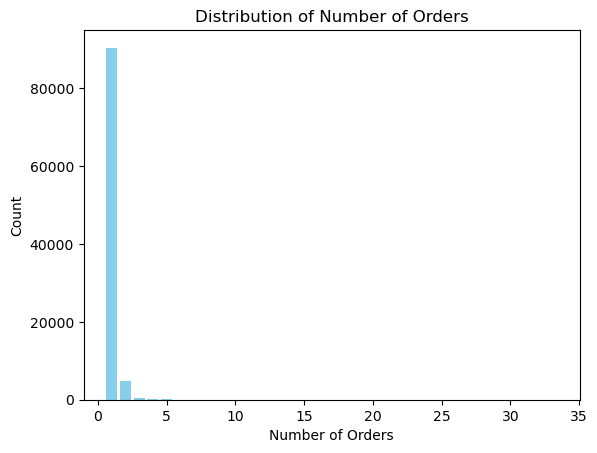

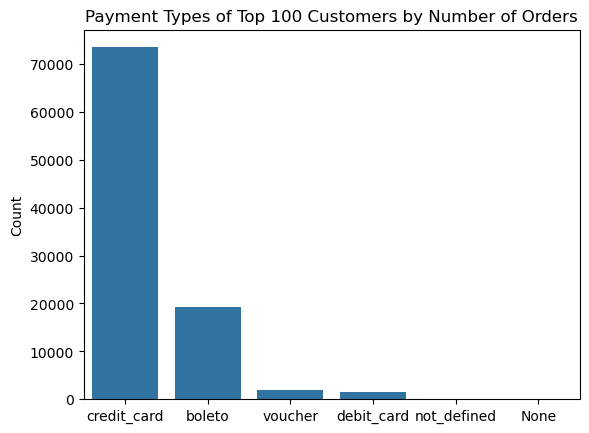

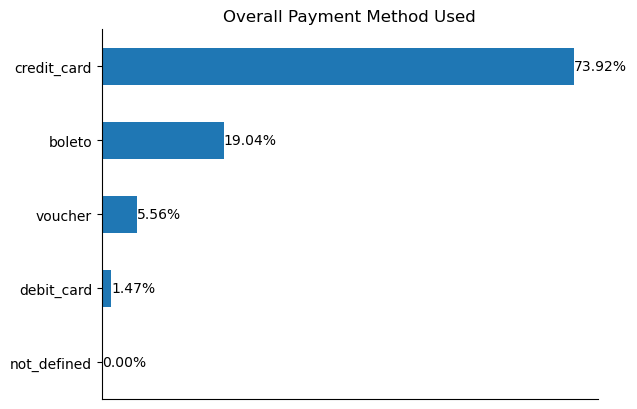

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get the value counts of number_of_orders
number_of_orders = aggregated_data['number_of_orders'].value_counts()

plt.bar(number_of_orders.index, number_of_orders.values, color='skyblue')
plt.xlabel('Number of Orders')
plt.ylabel('Count')
plt.title('Distribution of Number of Orders')
plt.xticks(rotation=360)
plt.show()


# Filter top customers
top_customers = aggregated_data.head(103000)
sns.countplot(x='most_frequent_payment_type', data=top_customers, order=top_customers['most_frequent_payment_type'].value_counts().index)
plt.title('Payment Types of Top 100 Customers by Number of Orders')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

ax = payment_types.plot.barh()
for index, value in enumerate(payment_types):
    ax.annotate(f'{value:.2f}%', xy=(value, index), va='center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks([])
plt.ylabel('')
plt.title('Overall Payment Method Used')
plt.show()


In [15]:
import scipy.stats as stats

# Create a contingency table
contingency_table = pd.crosstab(aggregated_data['most_frequent_payment_type'], aggregated_data['number_of_orders'])

# Perform the Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p:.2f}")
print(f"Degrees of freedom: {dof}")
print(f"expected: {expected}")

# Interpret the result
if p < 0.05:
    print("There is a significant association between payment method and order frequency.")
else:
    print("There is no significant association between payment method and order frequency.")


Chi-Square Statistic: 19887.701696111933
p-value: 0.00
Degrees of freedom: 110
expected: [[9.40382534e-01 4.99604562e-02 5.76506827e-03 1.69622045e-03
  7.07625708e-04 5.30719281e-04 3.12187812e-04 1.45687646e-04
  1.14468864e-04 6.24375624e-05 7.28438228e-05 6.24375624e-05
  4.16250416e-05 3.12187812e-05 2.08125208e-05 1.04062604e-05
  1.04062604e-05 2.08125208e-05 1.04062604e-05 1.04062604e-05
  1.04062604e-05 1.04062604e-05 1.04062604e-05]
 [1.81183503e+04 9.62588110e+02 1.11075570e+02 3.26810793e+01
  1.36338245e+01 1.02253684e+01 6.01492258e+00 2.80696387e+00
  2.20547161e+00 1.20298452e+00 1.40348193e+00 1.20298452e+00
  8.01989677e-01 6.01492258e-01 4.00994838e-01 2.00497419e-01
  2.00497419e-01 4.00994838e-01 2.00497419e-01 2.00497419e-01
  2.00497419e-01 2.00497419e-01 2.00497419e-01]
 [6.91472681e+04 3.67364231e+03 4.23911235e+02 1.24724786e+02
  5.20324259e+01 3.90243194e+01 2.29554820e+01 1.07125583e+01
  8.41701007e+00 4.59109640e+00 5.35627914e+00 4.59109640e+00
  3.06073

In [16]:
import pandas as pd

# Set display options
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Show full column width
pd.set_option('display.width', None)  # Set display width to None to avoid line breaks

contingency_table

number_of_orders,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,22,23,26,29,33
most_frequent_payment_type,,,,,,,,,,,,,,,,,,,,,,,
None,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
boleto,18600,607,48,7,1,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
credit_card,69293,3949,212,53,14,5,2,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
debit_card,1447,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
not_defined,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
voucher,1024,227,294,103,53,43,28,12,10,6,7,6,4,3,2,1,0,2,1,1,1,1,1


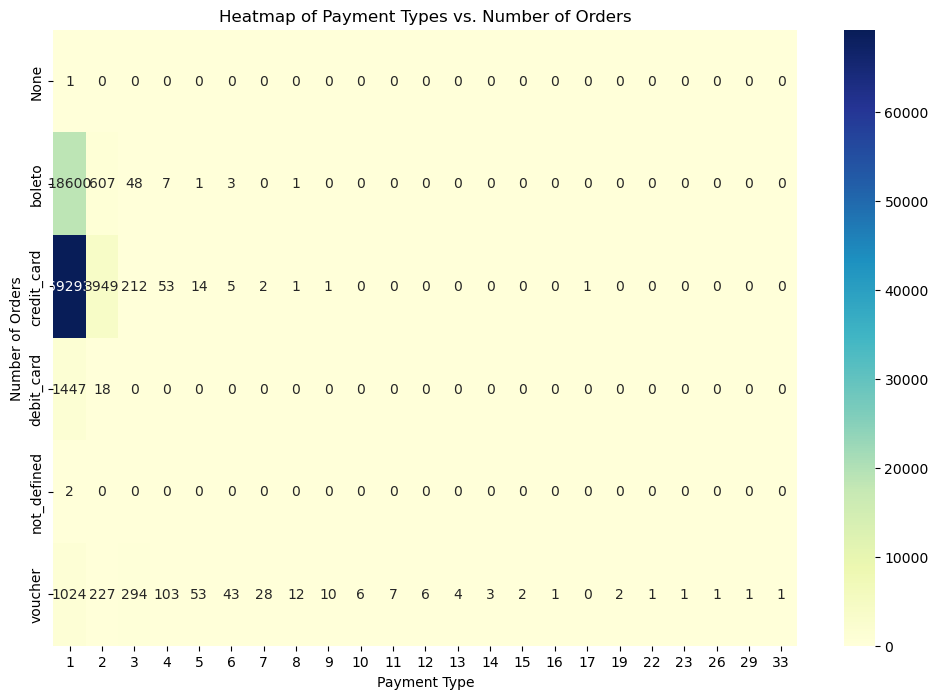

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Payment Types vs. Number of Orders')
plt.xlabel('Payment Type')
plt.ylabel('Number of Orders')
plt.show()


## contingency table shows the frequency distribution of the most frequent payment types and the number of orders:

### Performing a Chi-Square Test of Independence using the scipy.stats.chi2_contingency function.

A contingency table, also known as a cross-tabulation or crosstab, is a type of table used in statistics to display the frequency distribution of variables. It helps to understand the relationship between two categorical variables by showing how the variables interact with each other.

chi2_contingency(contingency_table): This function takes a contingency table as input and performs the Chi-Square Test of Independence. It returns four values:

chi2: The Chi-Square Statistic, which measures the difference between the observed and expected frequencies.

p: The p-value, which indicates the probability that the observed differences are due to chance. A low p-value (typically < 0.05) suggests that the observed differences are statistically significant.

dof: Degrees of freedom, which is a parameter used in the calculation of the Chi-Square Statistic. It is determined by the number of categories in the contingency table.

expected: The expected frequencies, which are the counts you would expect if there were no association between the variables.


Chi-Square Test Results
Chi-Square Statistic: 19887.701696111933

This very high value indicates a substantial difference between the observed and expected frequencies. It suggests that the observed distribution of payment methods is significantly different from what would be expected if there were no association between payment methods and order frequencies.

p-value: 0.00

This means the probability of the observed differences occurring by random chance is virtually zero. This indicates that the results are extremely statistically significant.

Degrees of Freedom: 110

This is based on the number of categories in your contingency table.

## Conclusion

Given the p-value is effectively zero, you can confidently reject the null hypothesis. This means there is a significant association between payment methods and order frequencies in your dataset. The observed distribution of payment methods is not due to random chance, and there is a meaningful relationship between how often customers order and the payment methods they use.

### Practical Implications
Significant Association: The significant association suggests that certain payment methods are preferred by customers who order more frequently. This insight can help you tailor marketing strategies and promotions to encourage the use of these preferred payment methods.

Data-Driven Decisions: By understanding the relationship between payment methods and order frequencies, you can make informed decisions to optimize sales and customer satisfaction.